In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
batch_size_train = 128
batch_size_test = 100
drop_last = False
num_workers = 2

In [4]:
meanI = torch.tensor([0.5])
stdI = torch.tensor([0.5])

In [5]:
transform_train = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize(mean=meanI, std=stdI),
])

In [6]:
transform_test = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize(mean=meanI, std=stdI),
])

In [19]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=num_workers, drop_last=drop_last)

In [8]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=False, num_workers=num_workers, drop_last=drop_last)

# parameters

In [9]:
image_size = 64
nc = 1
nz = 100
ngf = 64
ndf = 64
num_epochs = 50
lr = 0.0002
beta1 = 0.5
ngpu = 1

# Generator

In [10]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.conv1 = nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False)
        self.bn1 = nn.BatchNorm2d(ngf * 8)
        self.conv2 = nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(ngf * 4)
        self.conv3 = nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(ngf * 2)
        self.conv4 = nn.ConvTranspose2d(ngf * 2, nc, 4, 2, 1, bias=False)
        self.tanh = nn.Tanh()

    def forward(self, input):
        x = F.relu(self.bn1(self.conv1(input)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.tanh(self.conv4(x))
        return x

# Discriminator

In [11]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(nc, ndf, 4, 2, 1, bias=False)
        self.conv2 = nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(ndf * 2)
        self.conv3 = nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(ndf * 4)
        self.conv4 = nn.Conv2d(ndf * 4, 1, 4, 1, 0, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        x = F.leaky_relu(self.conv1(input), 0.2, inplace=True)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2, inplace=True)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2, inplace=True)
        x = self.sigmoid(self.conv4(x))
        return x.view(-1, 1).squeeze(1)

# Plot

In [12]:
def view_samples(samples, nrow=4, scale=2):
    # samples: Tensor of shape (N, C, H, W)
    samples = samples[:16]  # Select the first 16 samples
    n, c, h, w = samples.shape
    grid = torchvision.utils.make_grid(samples, nrow=nrow, normalize=True, padding=1)
    plt.figure(figsize=(nrow * scale, (16 // nrow) * scale))
    plt.imshow(grid.numpy().transpose((1, 2, 0)), cmap='Greys_r')
    plt.axis('off')
    plt.show()

# model

In [13]:
netG = Generator().to(device)
netD = Discriminator().to(device)
criterion = nn.BCELoss()

In [14]:
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

In [15]:
real_label = 1.
fake_label = 0.

In [16]:
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [17]:
G_losses = []
D_losses = []
iters = 0

# train loop

Epoch [1/50] Batch [1/469] Loss D: 0.6834, Loss G: 1.0629


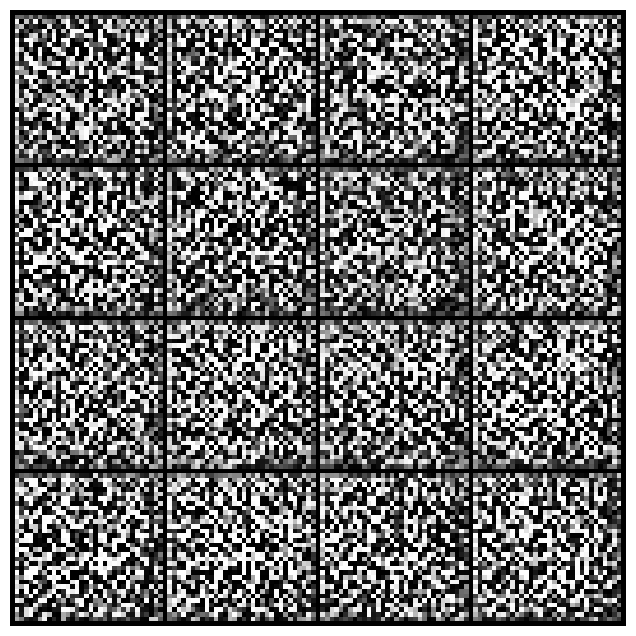

Epoch [2/50] Batch [1/469] Loss D: 0.5096, Loss G: 1.1526


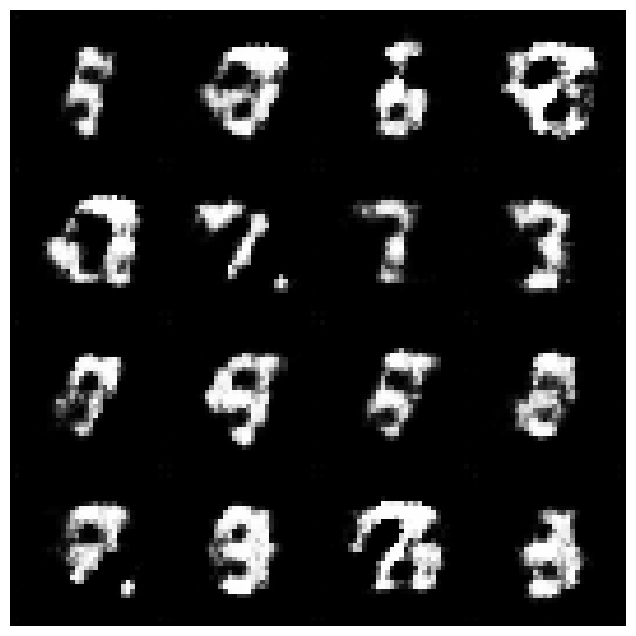

Epoch [3/50] Batch [1/469] Loss D: 0.4088, Loss G: 1.3613


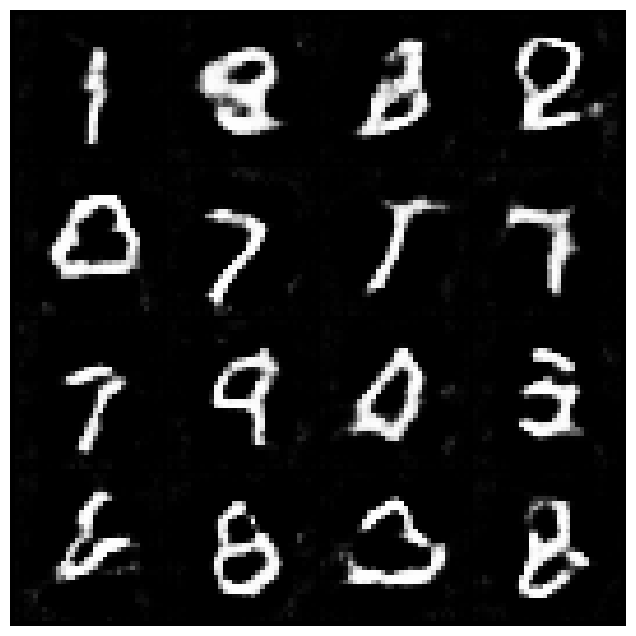

Epoch [4/50] Batch [1/469] Loss D: 0.4795, Loss G: 2.4377


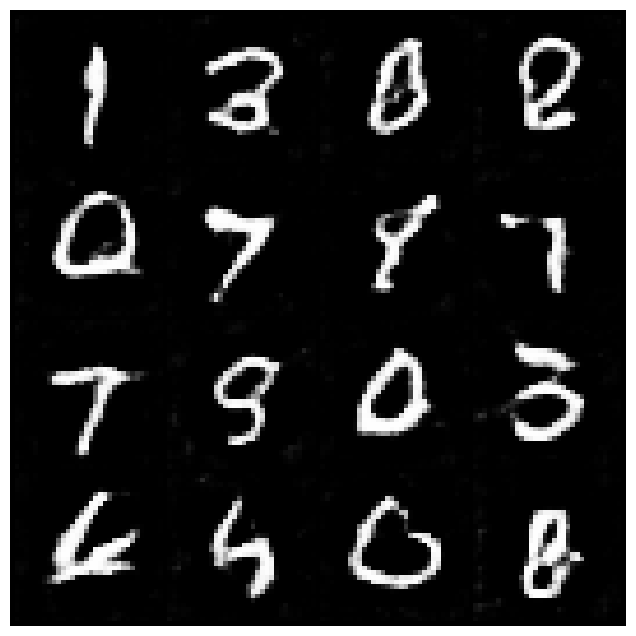

Epoch [5/50] Batch [1/469] Loss D: 0.4135, Loss G: 1.4651


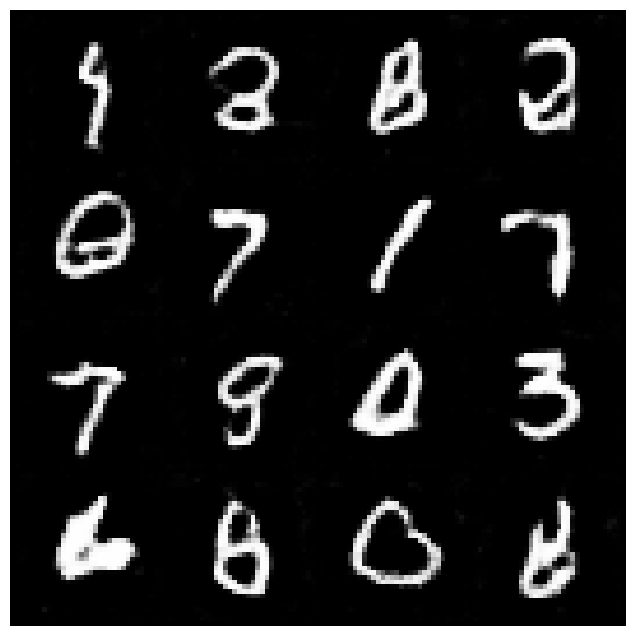

Epoch [6/50] Batch [1/469] Loss D: 0.3392, Loss G: 1.0571


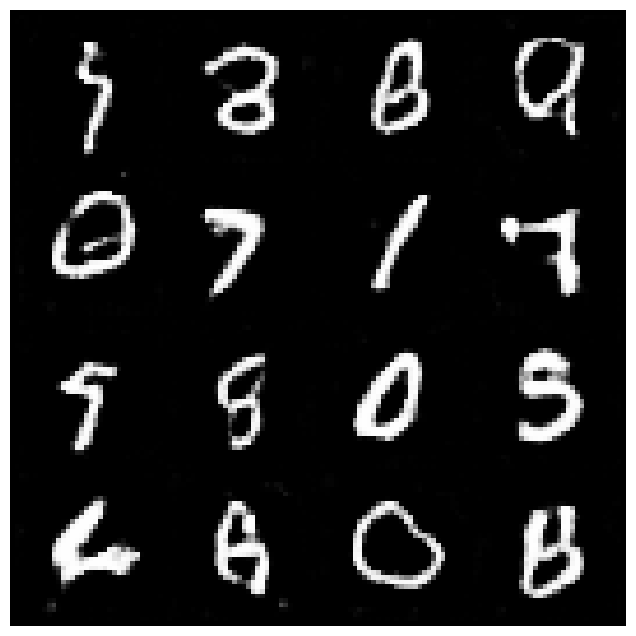

Epoch [7/50] Batch [1/469] Loss D: 0.4239, Loss G: 3.2539


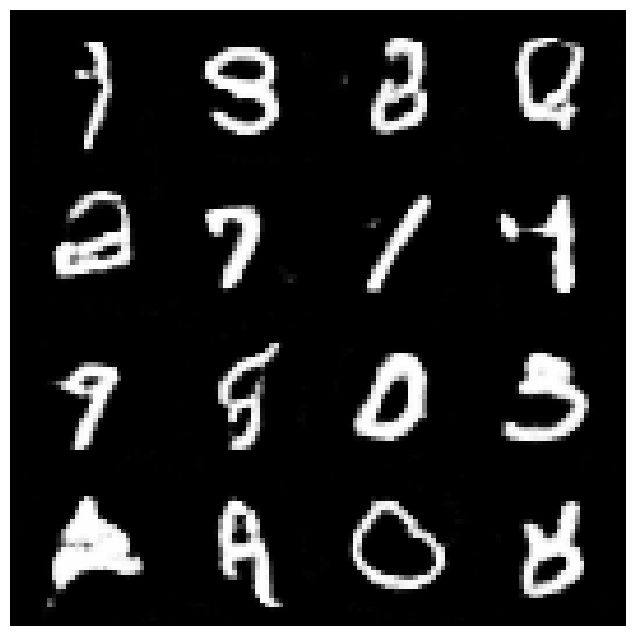

Epoch [8/50] Batch [1/469] Loss D: 0.3526, Loss G: 1.7134


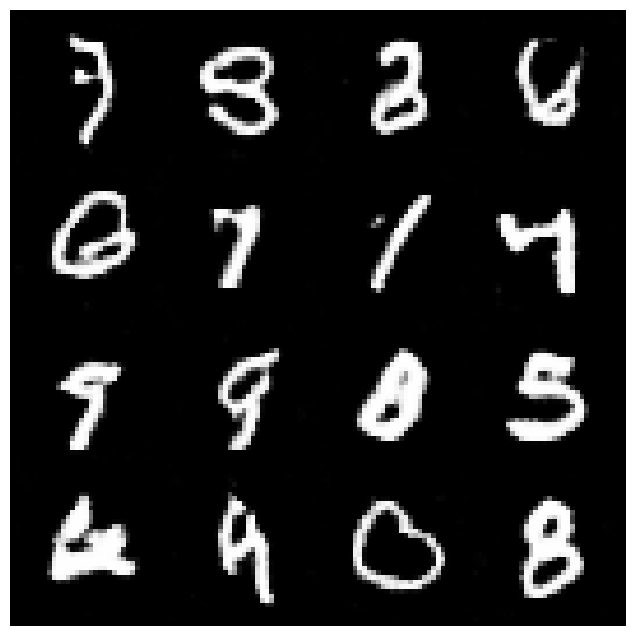

Epoch [9/50] Batch [1/469] Loss D: 0.3216, Loss G: 1.3864


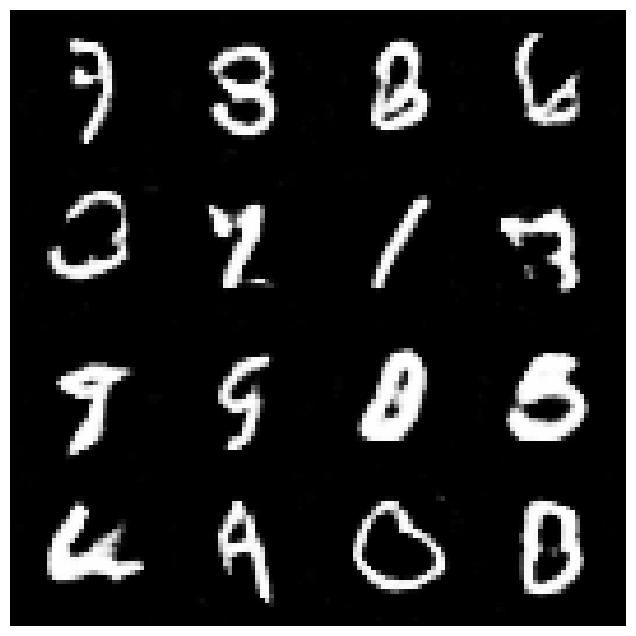

Epoch [10/50] Batch [1/469] Loss D: 0.2745, Loss G: 2.9598


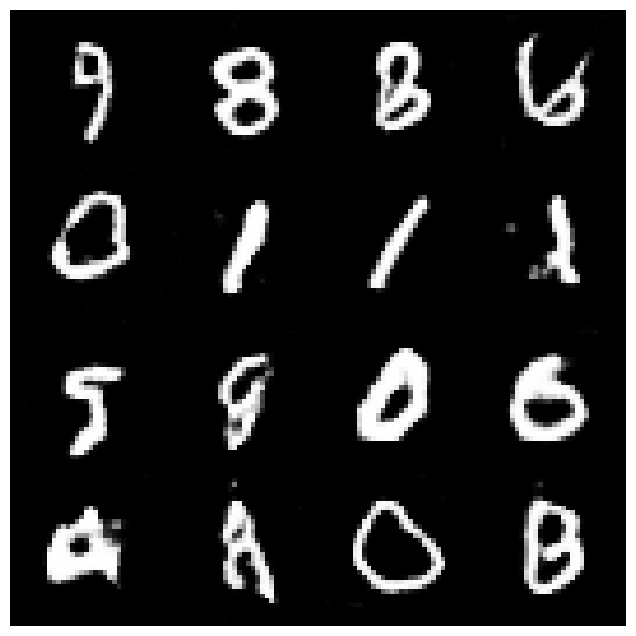

Epoch [11/50] Batch [1/469] Loss D: 0.2481, Loss G: 1.4846


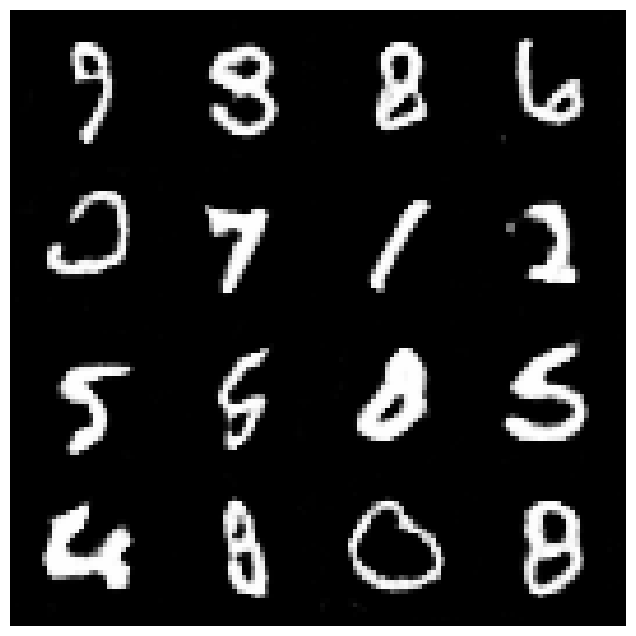

Epoch [12/50] Batch [1/469] Loss D: 0.4585, Loss G: 2.6522


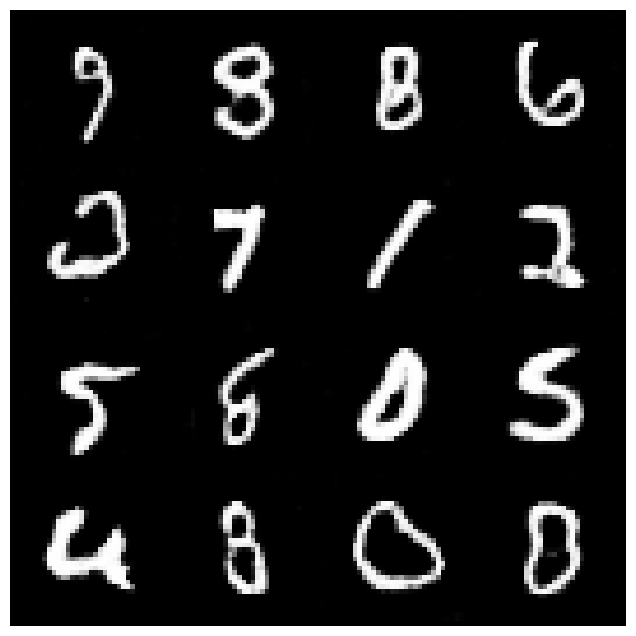

Epoch [13/50] Batch [1/469] Loss D: 0.3912, Loss G: 3.0283


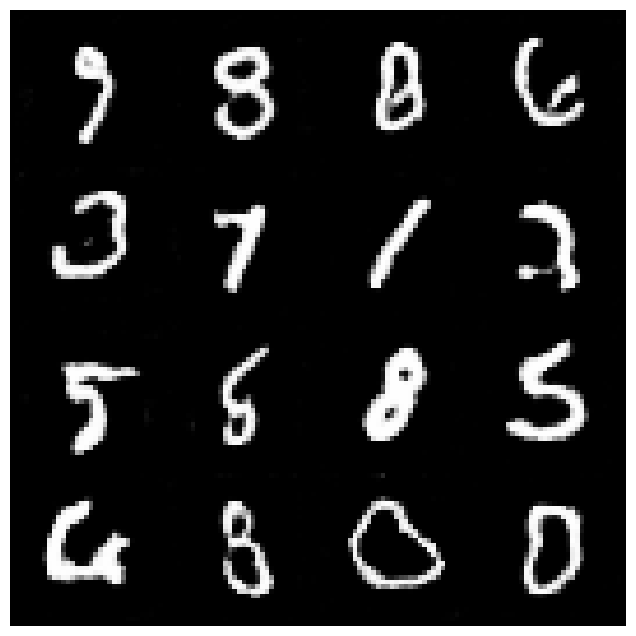

Epoch [14/50] Batch [1/469] Loss D: 0.3773, Loss G: 2.8457


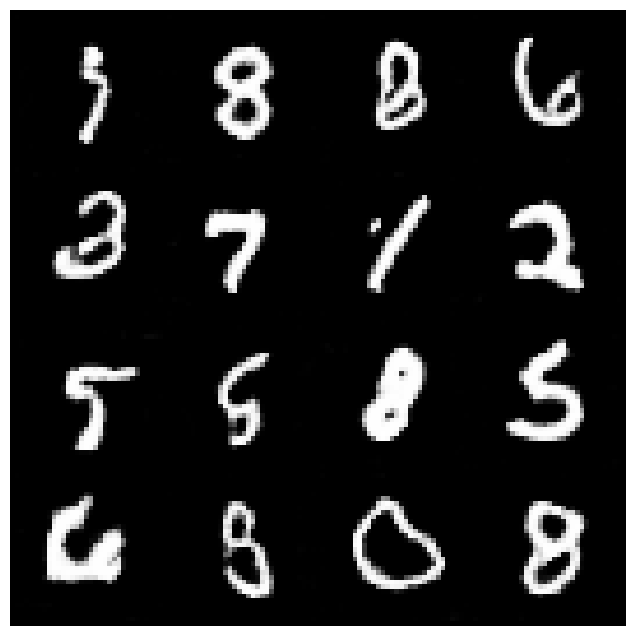

Epoch [15/50] Batch [1/469] Loss D: 0.2940, Loss G: 2.1481


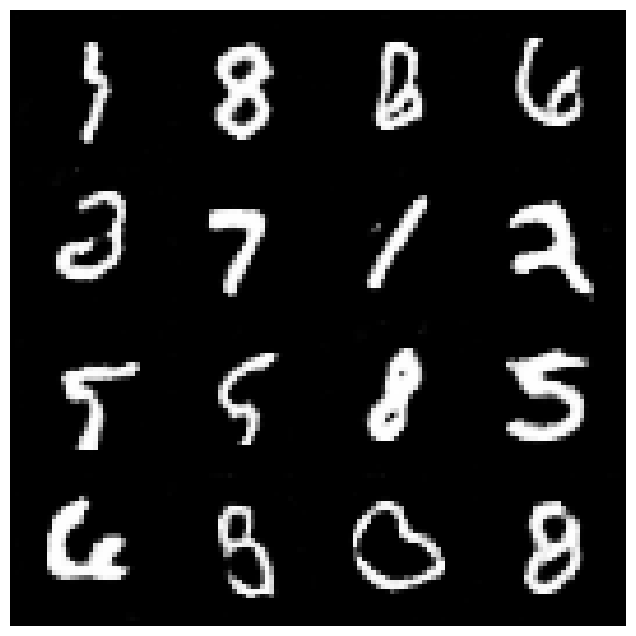

Epoch [16/50] Batch [1/469] Loss D: 0.2729, Loss G: 2.0241


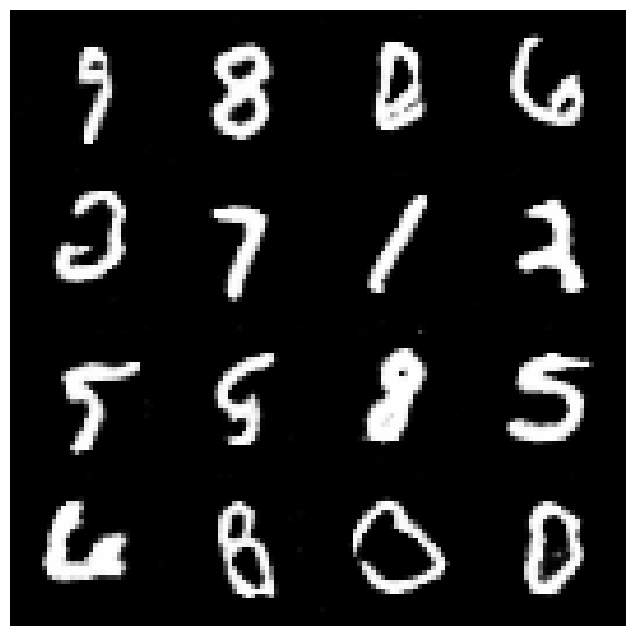

Epoch [17/50] Batch [1/469] Loss D: 0.2319, Loss G: 2.7877


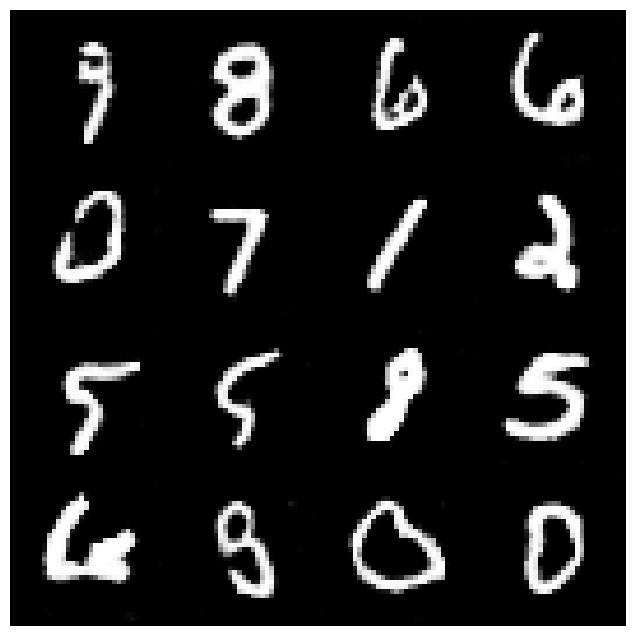

Epoch [18/50] Batch [1/469] Loss D: 0.2176, Loss G: 2.2022


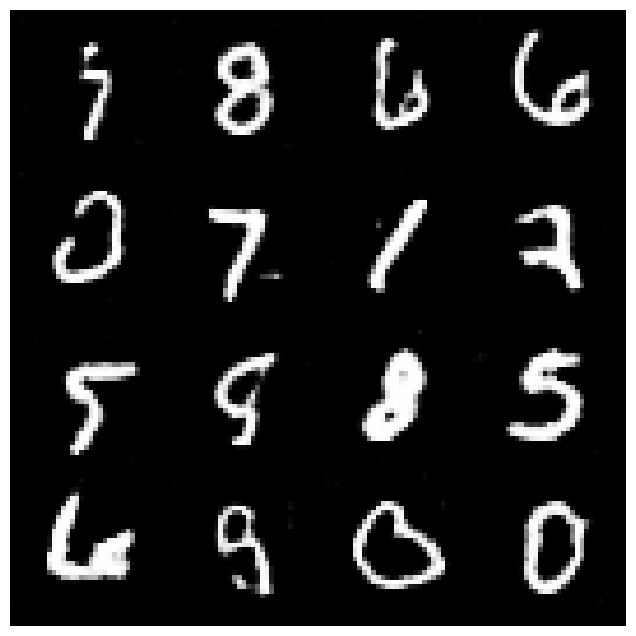

Epoch [19/50] Batch [1/469] Loss D: 0.2316, Loss G: 2.2643


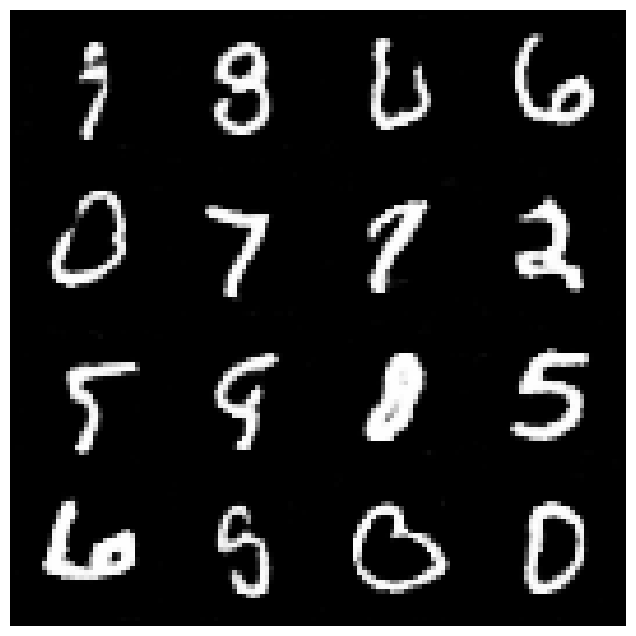

Epoch [20/50] Batch [1/469] Loss D: 0.2703, Loss G: 2.1063


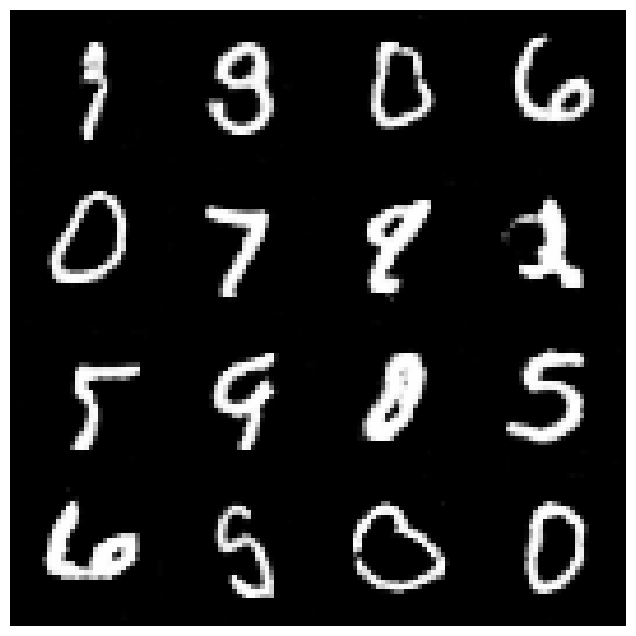

Epoch [21/50] Batch [1/469] Loss D: 0.3019, Loss G: 1.1857


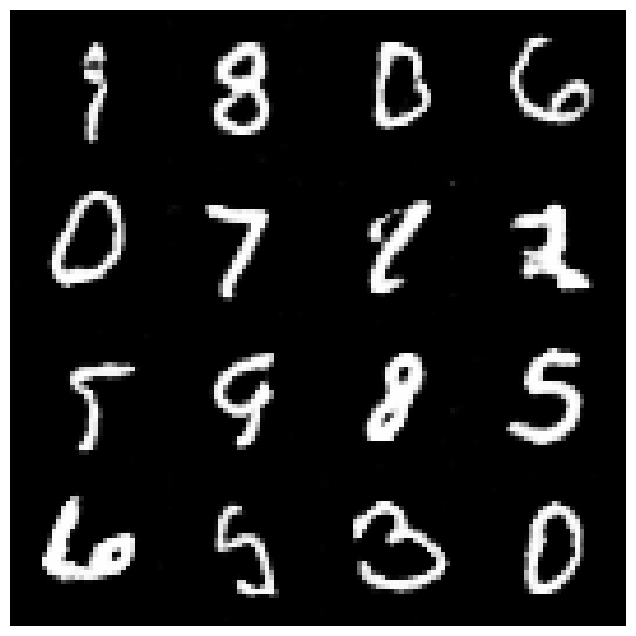

Epoch [22/50] Batch [1/469] Loss D: 0.2469, Loss G: 3.0321


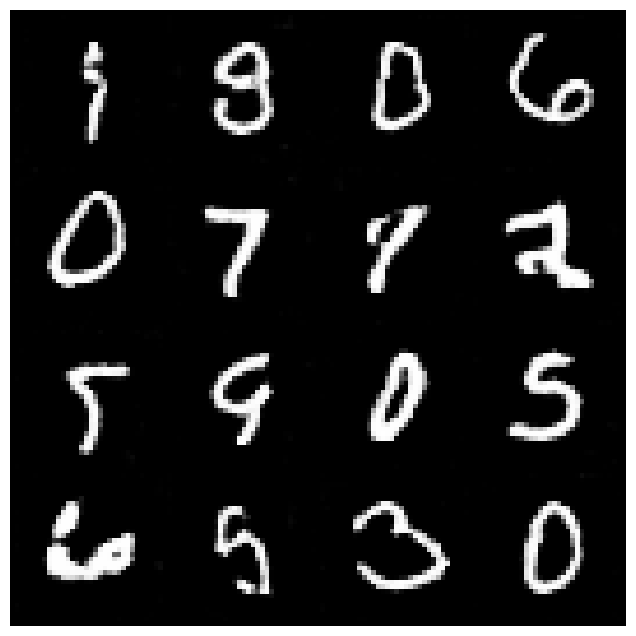

Epoch [23/50] Batch [1/469] Loss D: 0.2154, Loss G: 2.1181


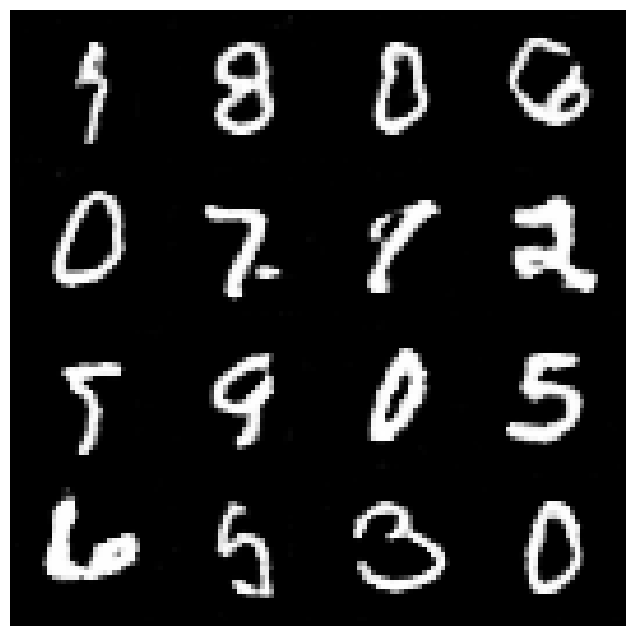

Epoch [24/50] Batch [1/469] Loss D: 0.3140, Loss G: 1.8889


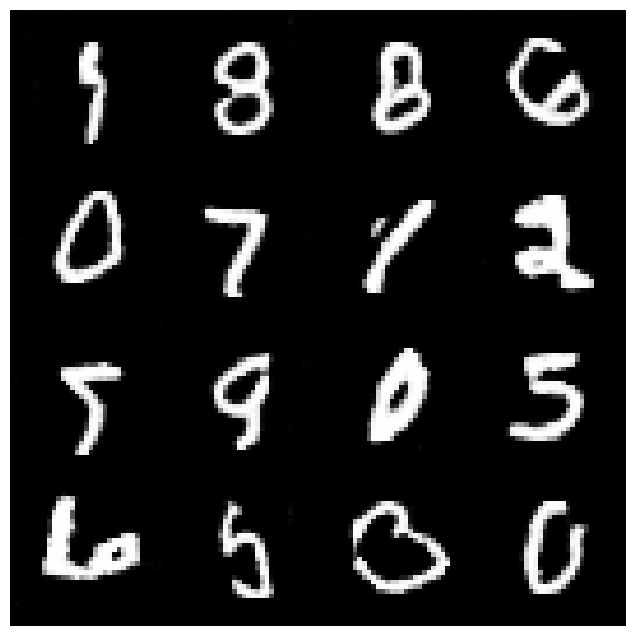

Epoch [25/50] Batch [1/469] Loss D: 0.1839, Loss G: 2.2174


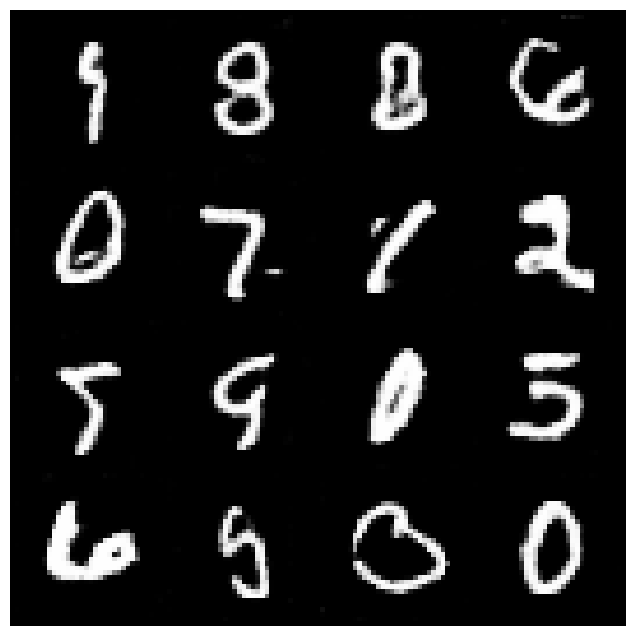

Epoch [26/50] Batch [1/469] Loss D: 0.3692, Loss G: 1.8439


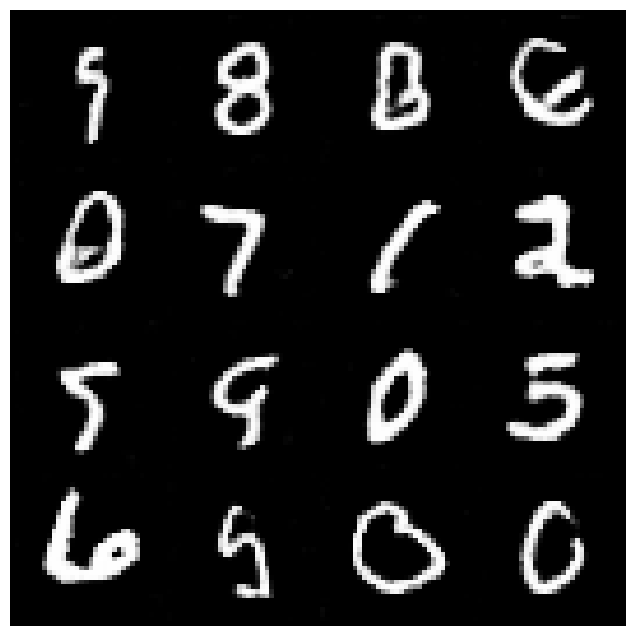

Epoch [27/50] Batch [1/469] Loss D: 0.3441, Loss G: 3.9365


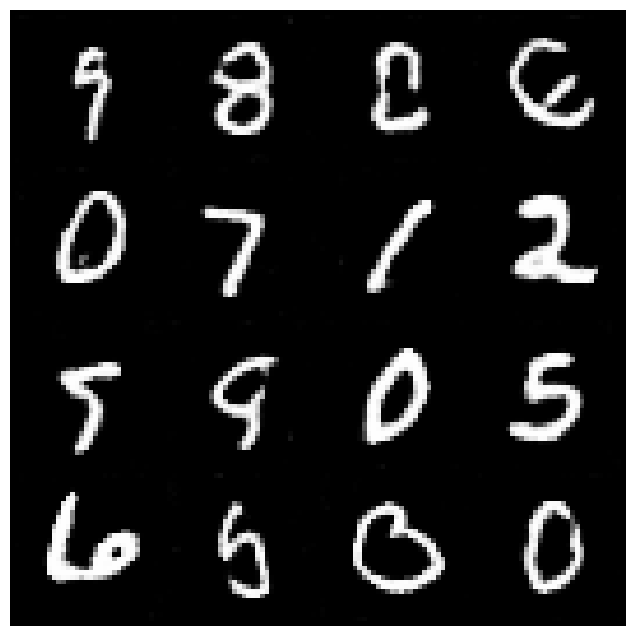

Epoch [28/50] Batch [1/469] Loss D: 0.2459, Loss G: 2.8693


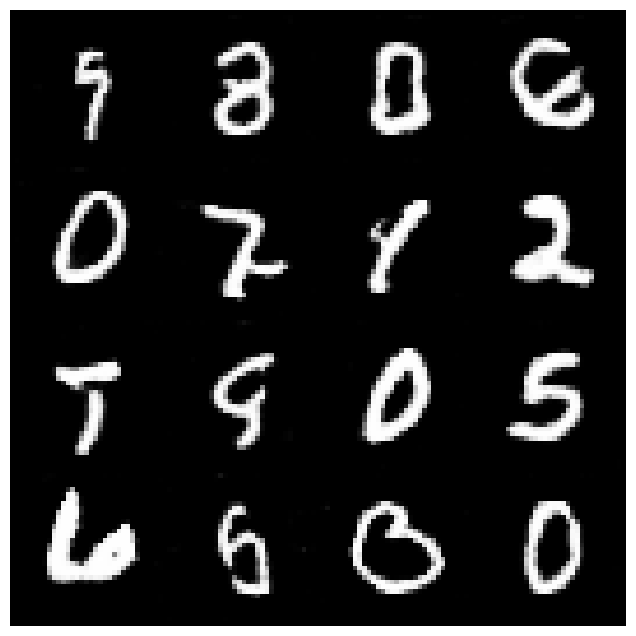

Epoch [29/50] Batch [1/469] Loss D: 0.2427, Loss G: 2.4197


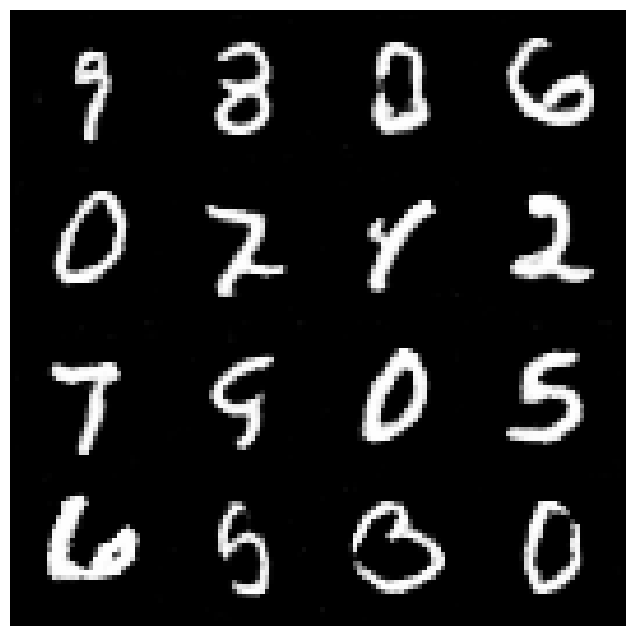

Epoch [30/50] Batch [1/469] Loss D: 0.2038, Loss G: 2.4989


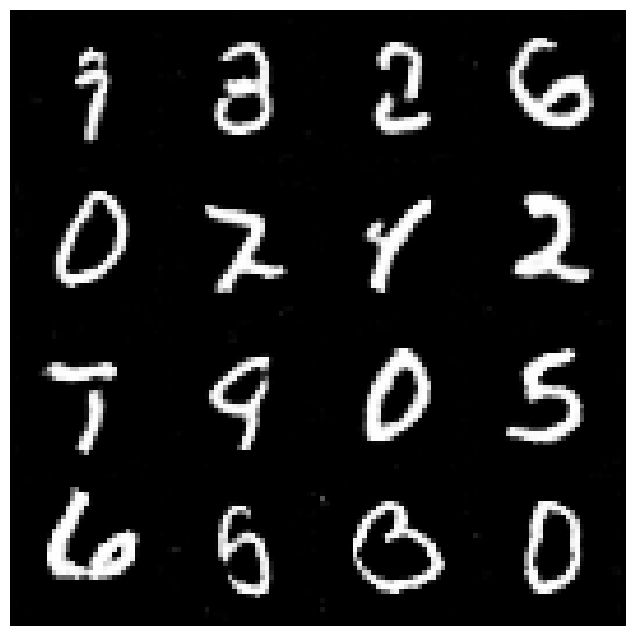

Epoch [31/50] Batch [1/469] Loss D: 0.2218, Loss G: 3.0243


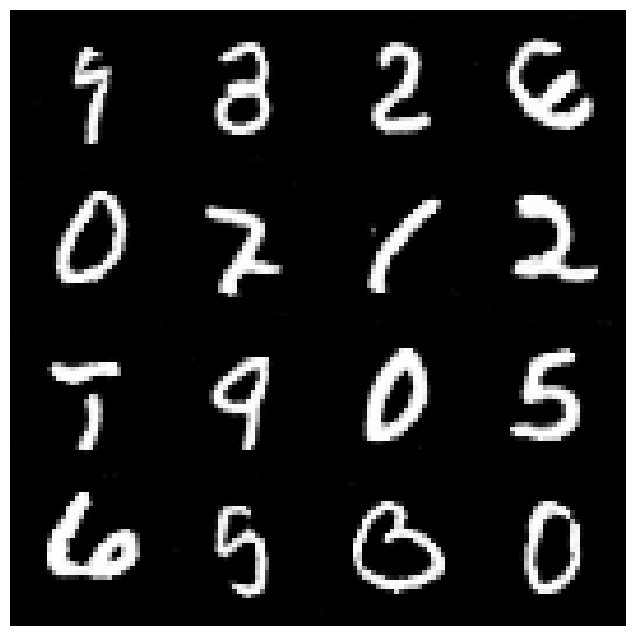

Epoch [32/50] Batch [1/469] Loss D: 0.1848, Loss G: 3.1300


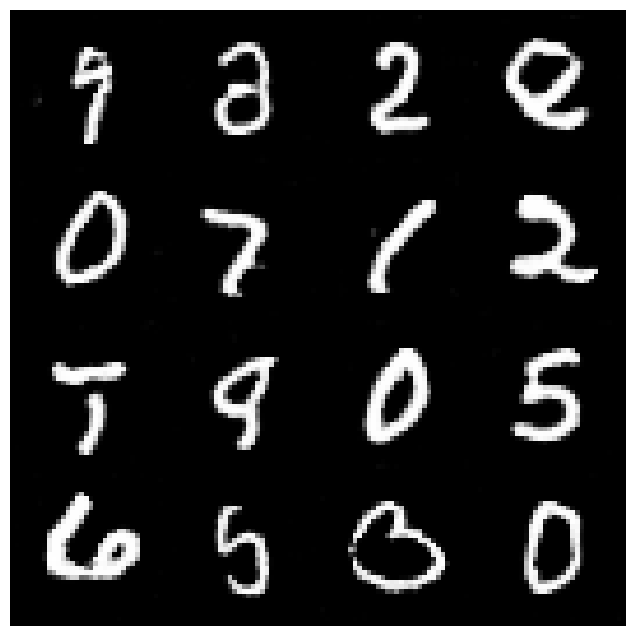

Epoch [33/50] Batch [1/469] Loss D: 0.2217, Loss G: 2.2774


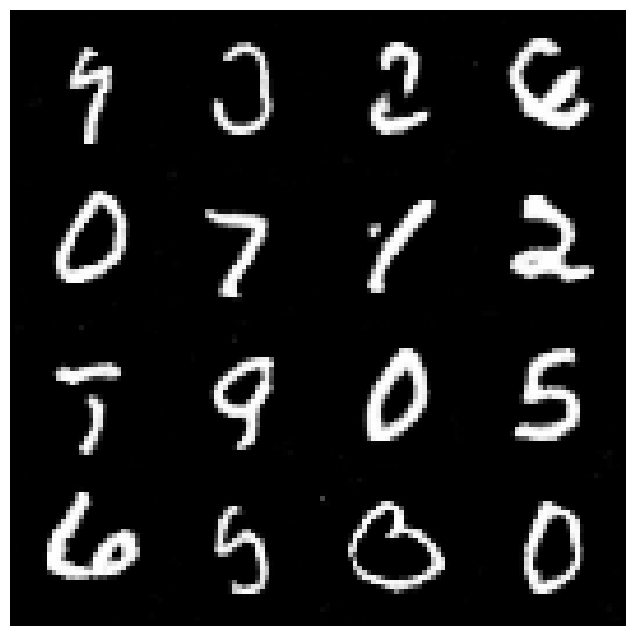

Epoch [34/50] Batch [1/469] Loss D: 0.1576, Loss G: 2.3991


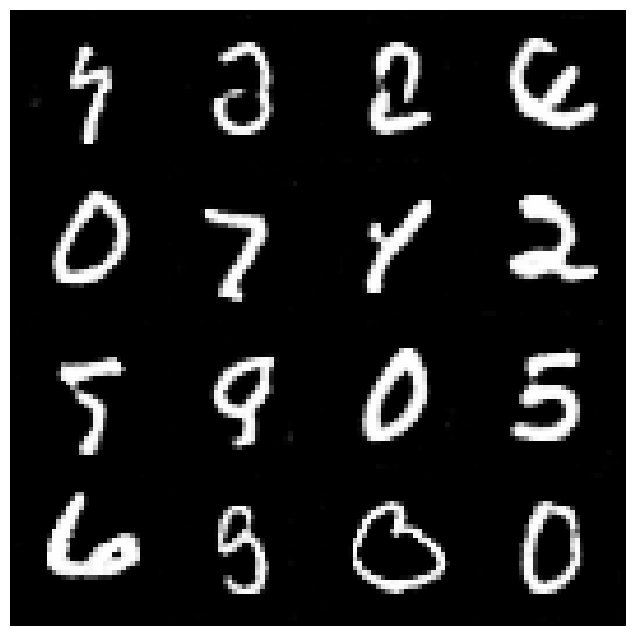

Epoch [35/50] Batch [1/469] Loss D: 0.2089, Loss G: 3.9574


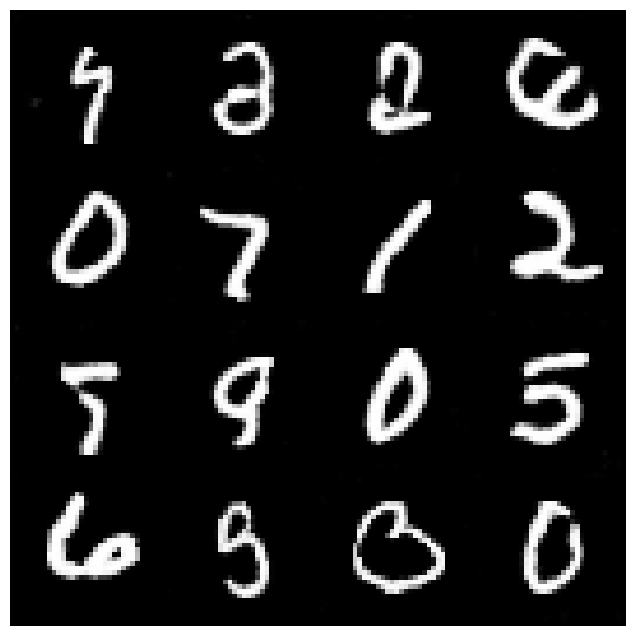

Epoch [36/50] Batch [1/469] Loss D: 0.2768, Loss G: 0.8808


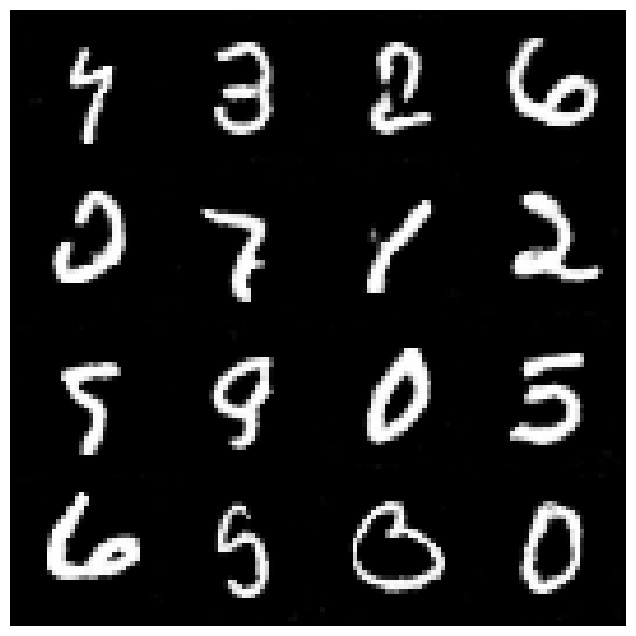

Epoch [37/50] Batch [1/469] Loss D: 0.1810, Loss G: 2.1191


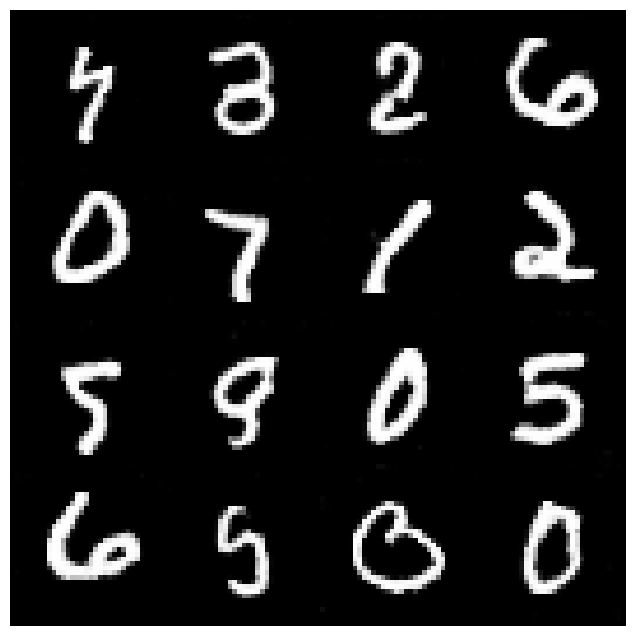

Epoch [38/50] Batch [1/469] Loss D: 0.1652, Loss G: 2.7128


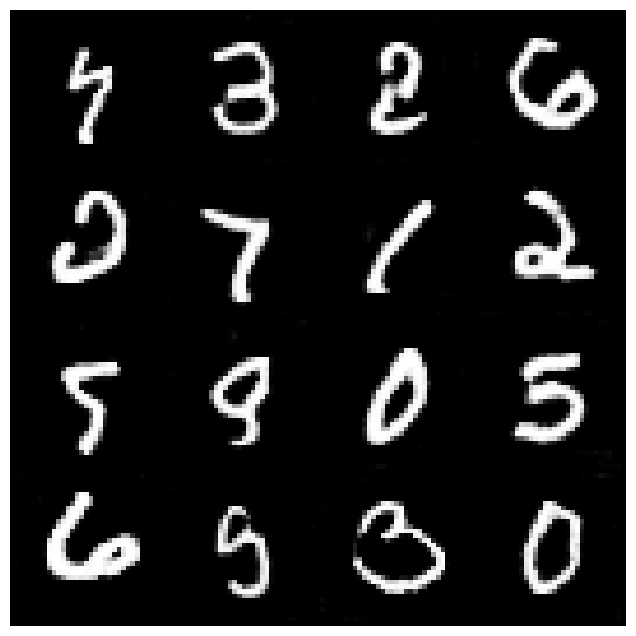

Epoch [39/50] Batch [1/469] Loss D: 0.2972, Loss G: 2.9334


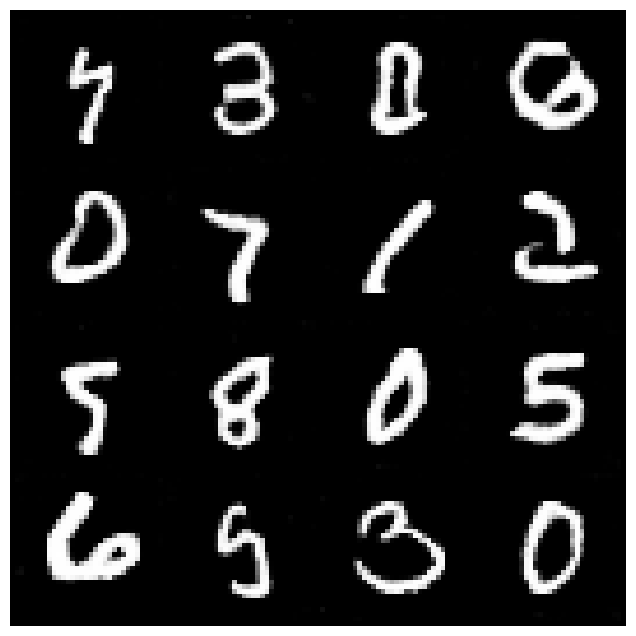

Epoch [40/50] Batch [1/469] Loss D: 0.6702, Loss G: 4.5555


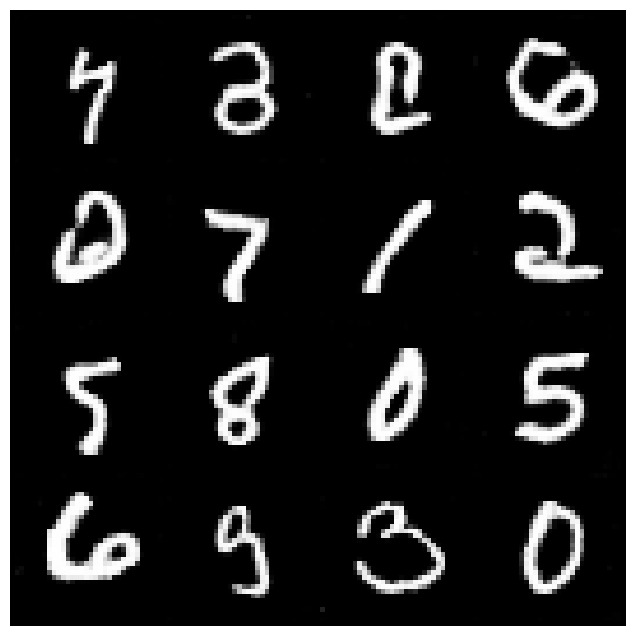

Epoch [41/50] Batch [1/469] Loss D: 0.2329, Loss G: 2.3565


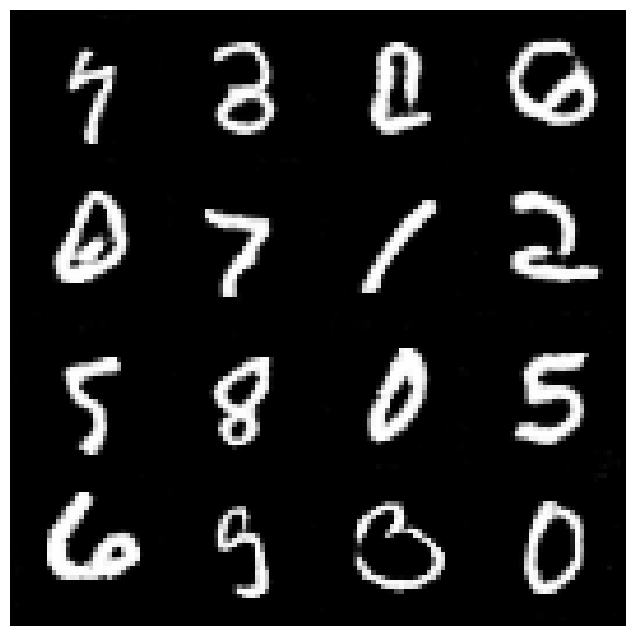

Epoch [42/50] Batch [1/469] Loss D: 0.1006, Loss G: 3.8329


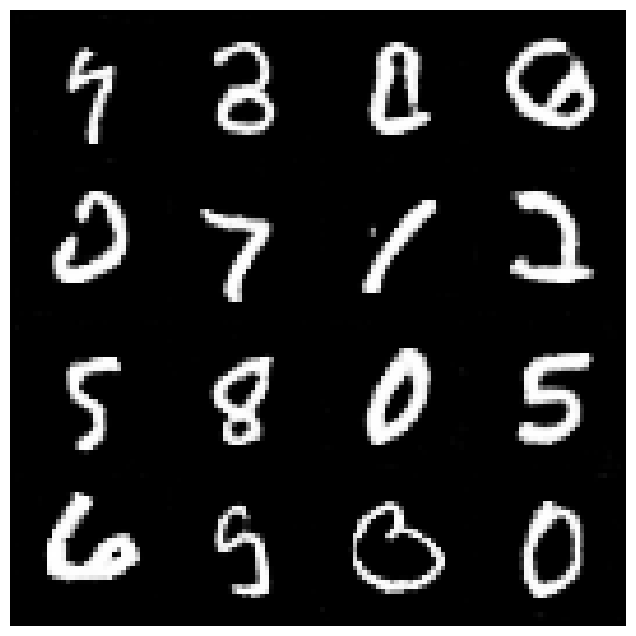

Epoch [43/50] Batch [1/469] Loss D: 0.2906, Loss G: 2.7429


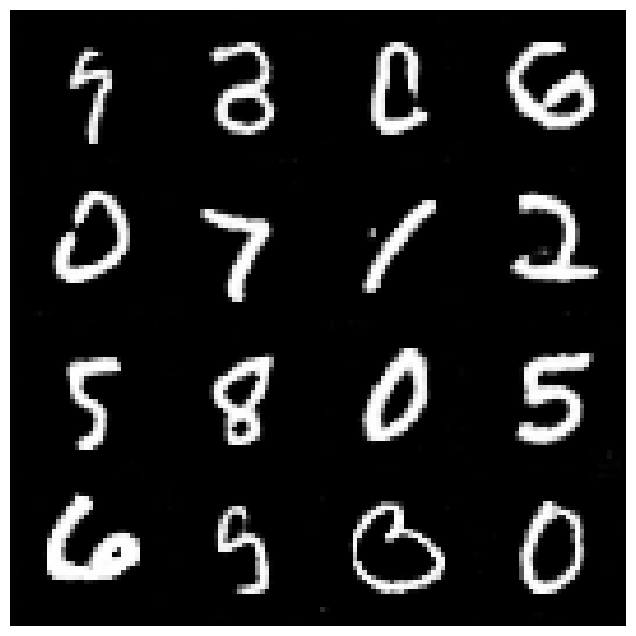

Epoch [44/50] Batch [1/469] Loss D: 0.2239, Loss G: 3.5024


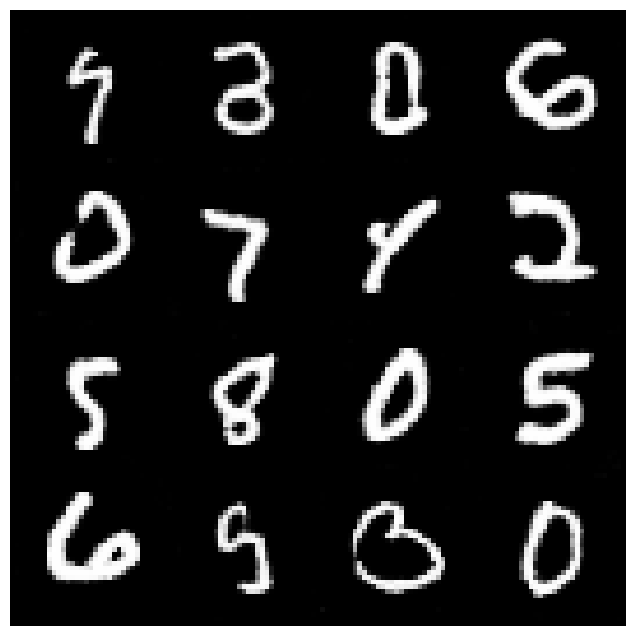

Epoch [45/50] Batch [1/469] Loss D: 0.2274, Loss G: 1.8724


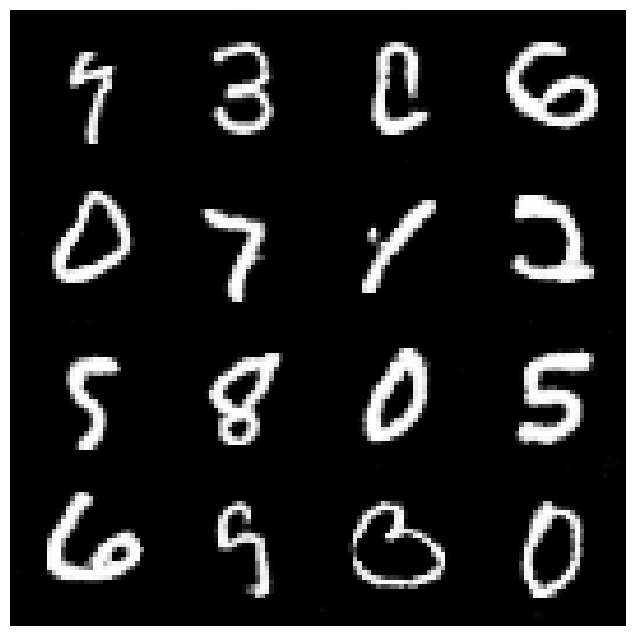

Epoch [46/50] Batch [1/469] Loss D: 0.1269, Loss G: 3.3412


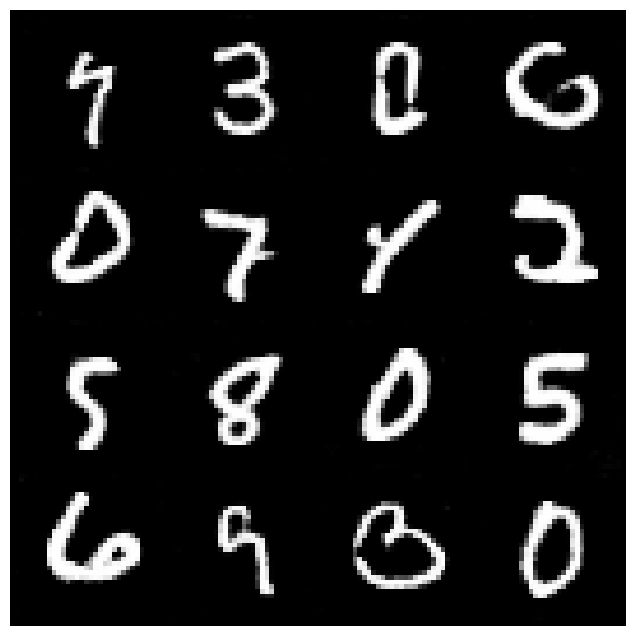

Epoch [47/50] Batch [1/469] Loss D: 0.6532, Loss G: 4.7572


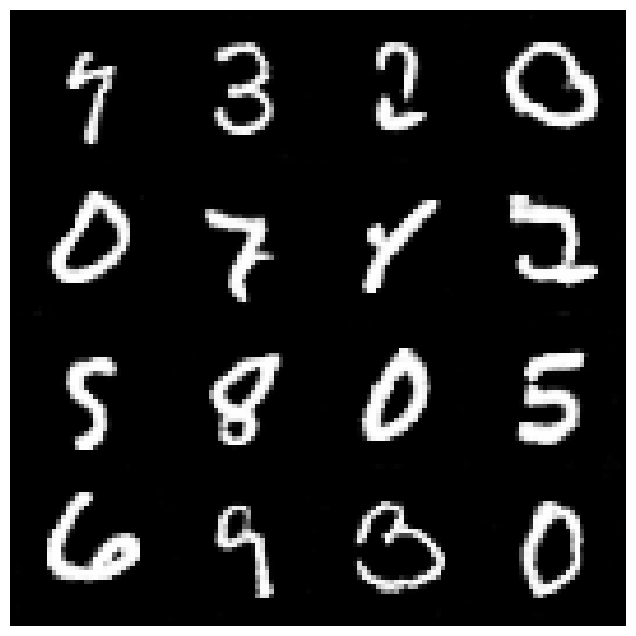

Epoch [48/50] Batch [1/469] Loss D: 0.2577, Loss G: 2.2617


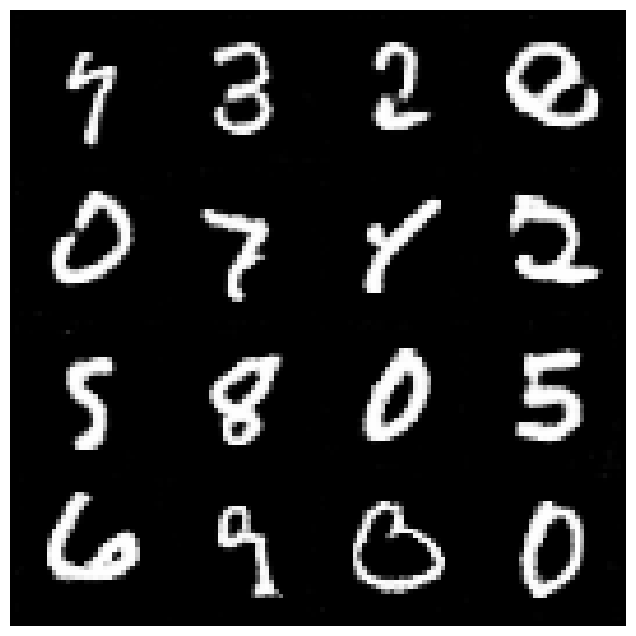

Epoch [49/50] Batch [1/469] Loss D: 0.1821, Loss G: 2.8396


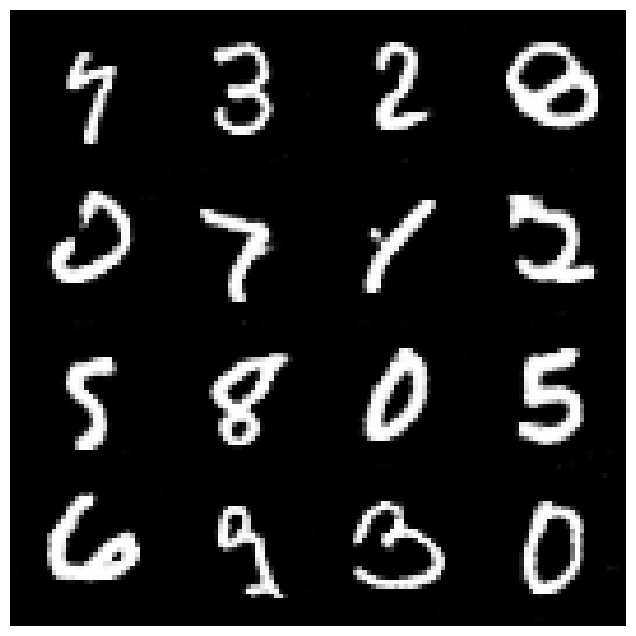

Epoch [50/50] Batch [1/469] Loss D: 0.1990, Loss G: 3.8171


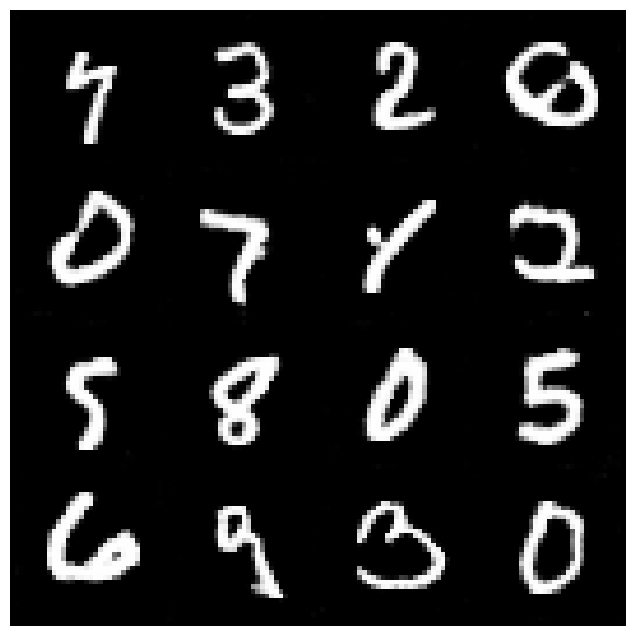

In [18]:
for epoch in range(num_epochs):
    for batch_idx, (real_cpu, _) in enumerate(trainloader):
        real_cpu = real_cpu.to(device)
        b_size = real_cpu.size(0)

        # Train Discriminator
        netD.zero_grad()
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_cpu)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = (errD_real + errD_fake) / 2
        optimizerD.step()

        # Train Generator
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        if batch_idx == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] "
                  f"Batch [{batch_idx + 1}/{len(trainloader)}] "
                  f"Loss D: {errD:.4f}, Loss G: {errG:.4f}")

            with torch.no_grad():
                fixed_fake = netG(fixed_noise).cpu()
            view_samples(fixed_fake)

        G_losses.append(errG.item())
        D_losses.append(errD.item())
        iters += 1
